In [57]:
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


import pandas
import numpy
import requests

In [78]:
class stockGroup:
    def __init__(self):
        self.stockList = []
        self.colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'white', 'purple', 'olive']
    
    def appendStocks(self, stocks):
        checkList = isinstance(stocks,list)
        if checkList == True:
            for stock in stocks:
                try:
                    yf.Ticker(stock).info
                    self.stockList.append(stock)
                except:
                    print(stock + " is not a valid stock symbol")
        else:
            try:
                yf.Ticker(stocks).info
                self.stockList.append(stocks)
            except:
                print(stock + " is not a valid stock symbol")
        
    def graphStocksOnClose(self, period):
        if period not in ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']:
            print(period + " is not available period")
            return
        
        colorIndex = 0
        shortNameList = []
        for stock in self.stockList:
            tickerClient = yf.Ticker(stock)
            data = tickerClient.history(period)
            info = tickerClient.info
            print(info['shortName'])
            priceOnClose = data['Close']
            plt.plot(priceOnClose, label=info['shortName'])
                        
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

    def graphStocksByPercentChange(self, period):
        if period not in ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']:
            print(period + " is not available period")
            return
        
        colorIndex = 0
        percentChangeList = []
        
        for stock in self.stockList:
            tickerClient = yf.Ticker(stock)
            data = tickerClient.history(period)
            info = tickerClient.info
            print(info['shortName'])
            priceOnClose = data['Close']
            length = priceOnClose['length']
            
            percentChangeList = []
            for i in range(1:length):
                priceChange = priceOnClose[i] - priceOnClose(i-1)
                percentChange = priceChange / priceOnClose(i-1)
                
                            
                if priceChange <= 0:
                    percentChangeList.append((-1*percentChange))
                else:
                    percentChangeList.append(percentChange)
            
            plt.plot(priceOnClose, label=info['shortName'])
                        
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

['MSFT', 'TSLA', 'EBAY', 'UBER', 'TWTR', 'NFLX', 'FB', 'GOOGL', 'AMZN']
Microsoft Corporation
Tesla, Inc.
eBay Inc.
Uber Technologies, Inc.
Twitter, Inc.
Netflix, Inc.
Facebook, Inc.
Alphabet Inc.
Amazon.com, Inc.


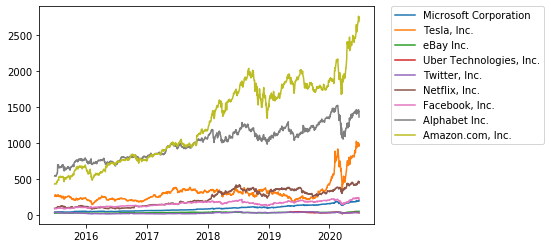

In [79]:
techStock = ['MSFT', 'TSLA', 'EBAY', 'UBER', 'TWTR', 'NFLX', 'FB', 'GOOGL', 'AMZN']
techStockGroup = stockGroup()
techStockGroup.appendStocks(techStock)
print(techStockGroup.stockList)
techStockGroup.graphStocksOnClose('5y')

In [85]:
client = yf.Ticker('MSFT')
print(client.info)
data = client.history('1y')
stuff = data['Close']
print(stuff)
print(stuff[0])

{'zip': '98052', 'sector': 'Technology', 'fullTimeEmployees': 144000, 'longBusinessSummary': 'Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. Its Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, and Skype for Business, as well as related Client Access Licenses (CAL); Skype, Outlook.com, and OneDrive; LinkedIn that includes Talent and marketing solutions, and subscriptions; and Dynamics 365, a set of cloud-based and on-premises business solutions for small and medium businesses, large organizations, and divisions of enterprises. Its Intelligent Cloud segment licenses SQL and Windows Servers, Visual Studio, System Center, and related CALs; GitHub that provides a collaboration platform and code hosting service for developers; and Azure, a cloud platform. It also provides support services and Microsoft consulting services to assist customers in d